data science end of year project part 3 cats vs dogs 9.8.21

In [1]:
#all the imports that i will need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score # didnt use
from sklearn.model_selection import cross_val_predict  # didnt use
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score  # didnt use
from sklearn.metrics import f1_score  # didnt use
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [2]:
import os
import cv2

in the next 6 cells i will be importing the data from picture form.
<br>when i import the pictures i will be changing the size to 100x100 pixcels and making them gray scale.
<br>because i dont want this done every time i rerun the notebook the next cells will be text because the code has alteady been run. 

train_dir=r'C:\Users\nechd\Desktop\train1'
test_dir=r'C:\Users\nechd\Desktop\test1'
image_size=100

def label_img(img):
    word_label=img.split('.')[-3]
    if word_label=='cat':return [0]
    elif word_label =='dog':return [1]

def create_train_data():
    training_data=[]
    for img in (os.listdir(train_dir)):
        label=label_img(img)
        path=os.path.join(train_dir,img)
        img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(image_size,image_size))
        training_data.append([img,label])
    np.save('train_data.npy',training_data)
    return training_data

def process_test_data():
    testing_data=[]
    for img in (os.listdir(test_dir)):
        path=os.path.join(test_dir,img)
       # img_num=img.split('.')[0]
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(image_size,image_size))
        testing_data.append(img)
    np.save('teat_data.npy',testing_data)  
    return testing_data
    

train_data=create_train_data()

testing_data_dont_touch=process_test_data()

in the next 20 cells i will be taking the data and putting into a dataframe format then save it on the computer and reupload it.
<br> because i dont want this done every time i rerun the notebook the next cells will be text because the code has already been run. 

def create_pic_row(y):
    df3=pd.DataFrame(train_data[y][0][0])
    for x in range (1,100):
        df2=pd.DataFrame(train_data[y][0][x])
        df3= df3.append(df2)
    df5=pd.DataFrame(train_data[y][1])
    df3= df3.append(df5)
    df3=df3.T
    return df3

data=create_pic_row(0)
for y in range(1,24999):
    count=y
    data1=create_pic_row(y) 
    data=data.append(data1) 
    print(y)
data      


data

columns=np.arange(0,10001)
columns
rows=np.arange(0,24999)
rows

data=data.set_axis(columns, axis='columns')
data=data.set_index(rows)

data

data.to_csv('cats_vs_dogs_train.csv')

def create_pic_row_test(y):
    df6=pd.DataFrame(testing_data_dont_touch[y][0])
    for x in range (1,100):
        df7=pd.DataFrame(testing_data_dont_touch[y][x])
        df6 = df6.append(df7)
    df6=df6.T
    return df6

data_testing_dont_touch=create_pic_row_test(0)
for y in range(1,12500):
    count=y
    data1=create_pic_row_test(y) 
    data_testing_dont_touch=data_testing_dont_touch.append(data1) 
    print(y)
data_testing_dont_touch      


data_testing_dont_touch 

columns=np.arange(0,10000)
columns
rows=np.arange(0,12500)
rows

data_testing_dont_touch=data_testing_dont_touch.set_axis(columns, axis='columns')
data_testing_dont_touch=data_testing_dont_touch.set_index(rows)

data_testing_dont_touch

data_testing_dont_touch.to_csv('cats_vs_dogs_test.csv')

In [3]:
#importing the train data frame that is saved to my computer
training_set=pd.read_csv(r"C:\Users\nechd\Desktop\cats_vs_dogs_train.csv")

In [4]:
training_set=training_set.drop(['Unnamed: 0'], axis=1)
training_set

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,168,174,177,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,43,44,43,42,52,34,51,40,39,63,...,47,50,49,55,63,64,89,19,36,0
2,39,25,43,49,47,57,58,54,53,59,...,158,150,133,135,145,160,169,171,153,0
3,221,224,222,228,229,224,224,235,229,227,...,212,204,204,203,215,222,217,211,213,0
4,115,119,122,91,83,95,132,131,149,180,...,96,97,94,100,119,95,90,95,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,122,128,124,125,127,129,130,128,125,122,...,49,49,45,32,32,35,26,21,17,1
24995,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,1
24997,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,1


In [5]:
#importing the test data frame that is saved to my computer
testing_set_dont_touch_csv=pd.read_csv(r'C:\Users\nechd\Desktop\cats_vs_dogs_test1.csv')

In [6]:
testing_set_dont_touch_csv

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,64,57,54,63,66,68,64,65,57,...,153,211,211,191,119,133,147,170,179,82
1,1,9,9,9,9,4,8,104,98,86,...,101,77,77,84,78,69,66,73,63,77
2,2,3,3,3,2,2,2,3,3,4,...,249,249,244,242,252,250,251,250,235,253
3,3,131,135,194,155,199,219,151,175,185,...,161,170,164,177,140,124,154,191,162,124
4,4,126,131,108,192,216,222,222,191,218,...,150,135,116,140,157,161,152,118,133,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,12495,38,41,46,49,53,56,57,58,66,...,139,137,125,138,134,121,128,127,123,116
12496,12496,142,145,52,203,125,141,146,91,193,...,25,34,10,55,32,22,12,16,32,31
12497,12497,215,209,231,233,210,242,206,237,231,...,155,155,148,156,138,123,106,126,119,116
12498,12498,107,109,123,134,143,148,156,168,174,...,126,128,131,128,127,122,121,118,123,122


In [7]:
testing_set_dont_touch_csv=testing_set_dont_touch_csv.drop(['Unnamed: 0'], axis=1)
testing_set_dont_touch_csv

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,64,57,54,63,66,68,64,65,57,59,...,153,211,211,191,119,133,147,170,179,82
1,9,9,9,9,4,8,104,98,86,84,...,101,77,77,84,78,69,66,73,63,77
2,3,3,3,2,2,2,3,3,4,6,...,249,249,244,242,252,250,251,250,235,253
3,131,135,194,155,199,219,151,175,185,191,...,161,170,164,177,140,124,154,191,162,124
4,126,131,108,192,216,222,222,191,218,217,...,150,135,116,140,157,161,152,118,133,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,38,41,46,49,53,56,57,58,66,70,...,139,137,125,138,134,121,128,127,123,116
12496,142,145,52,203,125,141,146,91,193,99,...,25,34,10,55,32,22,12,16,32,31
12497,215,209,231,233,210,242,206,237,231,198,...,155,155,148,156,138,123,106,126,119,116
12498,107,109,123,134,143,148,156,168,174,178,...,126,128,131,128,127,122,121,118,123,122


In [8]:
#splitting the data
train_set, test_set = train_test_split(training_set, test_size=0.2, random_state=42)

In [9]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
23310,62,69,47,35,36,66,27,35,50,85,...,133,163,151,86,132,133,163,74,102,1
23622,62,65,77,96,109,74,75,77,59,51,...,115,102,147,104,49,94,81,137,121,1
1020,20,16,23,41,45,34,30,31,30,24,...,112,100,74,39,50,115,111,109,39,0
12645,96,107,101,112,128,124,118,120,129,99,...,104,116,100,103,97,102,94,99,92,1
1533,191,189,84,101,192,197,191,99,93,86,...,23,25,22,16,20,13,18,17,14,0


In [10]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
6868,50,49,52,53,51,48,40,115,136,152,...,111,109,109,105,102,98,95,91,69,0
19677,140,141,141,142,144,139,131,127,129,137,...,49,49,51,52,50,50,51,51,51,1
9668,81,93,95,110,98,106,116,42,159,99,...,7,5,0,1,0,1,4,1,3,0
13640,233,229,149,147,127,107,105,103,104,101,...,102,104,99,97,92,88,98,99,95,1
14018,189,176,176,186,144,167,200,203,194,150,...,176,207,183,145,165,167,169,153,146,1


In [11]:
# changing the data type and spliiting into x,y
train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')


x_train_set=train_set[ : , 0:10000]
y_train_set=train_set[ : , 10000]
x_test_set=test_set[ : , 0:10000]
y_test_set=test_set[ : , 10000]

In [12]:
x_train_set

array([[ 62.,  69.,  47., ..., 163.,  74., 102.],
       [ 62.,  65.,  77., ...,  81., 137., 121.],
       [ 20.,  16.,  23., ..., 111., 109.,  39.],
       ...,
       [ 65.,  71.,  67., ...,  40.,  41.,  31.],
       [142., 164., 128., ..., 114., 119., 157.],
       [111.,  73.,  60., ...,  18.,  22.,  19.]], dtype=float32)

In [13]:
y_train_set

array([1., 1., 0., ..., 0., 1., 1.], dtype=float32)

In [14]:
x_test_set

array([[ 50.,  49.,  52., ...,  95.,  91.,  69.],
       [140., 141., 141., ...,  51.,  51.,  51.],
       [ 81.,  93.,  95., ...,   4.,   1.,   3.],
       ...,
       [ 88.,  92.,  95., ..., 182., 180., 180.],
       [201., 195., 205., ..., 150., 164., 202.],
       [236., 236., 236., ..., 202., 198., 197.]], dtype=float32)

In [15]:
y_test_set

array([0., 1., 0., ..., 0., 1., 0.], dtype=float32)

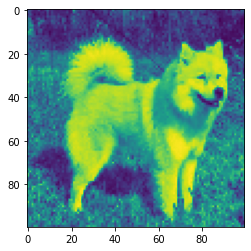

In [16]:
image1=x_train_set[0, :].reshape((100,100))
plt.imshow(image1)

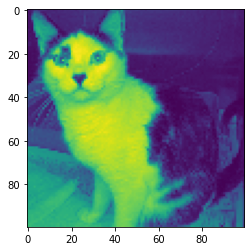

In [17]:
image1=x_train_set[2, :].reshape((100,100))
plt.imshow(image1)

In [18]:
pca1=PCA(n_components=0.9)
x_train_reduced1=pca1.fit_transform(x_train_set)
x_test_reduced1=pca1.transform(x_test_set)

In [19]:
pca1.n_components_

333

In [20]:
knn1 = KNeighborsClassifier(n_neighbors=27)
knn1.fit(x_train_reduced1, y_train_set)
y_pred_knn1=knn1.predict(x_test_reduced1)
accuracy_knn1=metrics.accuracy_score(y_test_set, y_pred_knn1)
accuracy_knn1

0.616

In [21]:
mat_knn1=confusion_matrix(y_test_set, y_pred_knn1)
mat_knn1

array([[1434, 1081],
       [ 839, 1646]], dtype=int64)

In [22]:
print("precision_score_knn:",precision_score(y_test_set, y_pred_knn1)) 
print("recall_score_knn:",recall_score(y_test_set, y_pred_knn1))
print("f1_score_knn:",f1_score(y_test_set, y_pred_knn1))

precision_score_knn: 0.6035936927026035
recall_score_knn: 0.6623742454728371
f1_score_knn: 0.6316193399846508


In [23]:
#cross validation
cv_scores_knn1=cross_val_score(knn1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.6085    0.604     0.61775   0.6015    0.6084021] mean: 0.6080304201050263


In [24]:
XG1=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG1.fit(x_train_reduced1, y_train_set)
y_pred_XG1=XG1.predict(x_test_reduced1)
accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
accuracy_XG1

0.6424

In [25]:
mat_XG1=confusion_matrix(y_test_set, y_pred_XG1)
mat_XG1

array([[1590,  925],
       [ 863, 1622]], dtype=int64)

In [26]:
print("precision_score_XG1:",precision_score(y_test_set, y_pred_XG1)) 
print("recall_score_XG1:",recall_score(y_test_set, y_pred_XG1))
print("f1_score_XG1:",f1_score(y_test_set, y_pred_XG1))

precision_score_XG1: 0.6368276403612093
recall_score_XG1: 0.6527162977867204
f1_score_XG1: 0.6446740858505565


In [27]:
#cross validation
cv_scores_XG1=cross_val_score(XG1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[0.628      0.63725    0.64225    0.64775    0.64216054] mean: 0.6394821080270068


In [28]:
pca2=PCA(n_components=0.8)
x_train_reduced2=pca2.fit_transform(x_train_set)
x_train_recovered2=pca2.inverse_transform(x_train_reduced2)
x_test_reduced2=pca2.transform(x_test_set)
x_test_recovered2=pca2.inverse_transform(x_test_reduced2)

In [29]:
pca2.n_components_

72

In [30]:
knn2 = KNeighborsClassifier(n_neighbors=16)
knn2.fit(x_train_recovered2, y_train_set)
y_pred_knn2=knn2.predict(x_test_recovered2)
accuracy_knn2=metrics.accuracy_score(y_test_set, y_pred_knn2)
accuracy_knn2

0.6236

In [31]:
mat_knn2=confusion_matrix(y_test_set, y_pred_knn2)
mat_knn2

array([[1495, 1020],
       [ 862, 1623]], dtype=int64)

In [32]:
print("precision_score_knn2:",precision_score(y_test_set, y_pred_knn2)) 
print("recall_score_knn2:",recall_score(y_test_set, y_pred_knn2))
print("f1_score_knn2:",f1_score(y_test_set, y_pred_knn2))

precision_score_knn2: 0.6140749148694665
recall_score_knn2: 0.6531187122736418
f1_score_knn2: 0.6329953198127926


In [33]:
#cross validation
cv_scores_knn2=cross_val_score(knn2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn2, "mean:", np.mean(cv_scores_knn2))

[0.61575    0.61075    0.61       0.598      0.60290073] mean: 0.607480145036259


In [34]:
XG2=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG2.fit(x_train_reduced2, y_train_set)
y_pred_XG2=XG2.predict(x_test_reduced2)
accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
accuracy_XG2

0.6256

In [35]:
mat_XG2=confusion_matrix(y_test_set, y_pred_XG2)
mat_XG2

array([[1467, 1048],
       [ 824, 1661]], dtype=int64)

In [36]:
print("precision_score_XG2:",precision_score(y_test_set, y_pred_XG2)) 
print("recall_score_XG2:",recall_score(y_test_set, y_pred_XG2))
print("f1_score_XG2:",f1_score(y_test_set, y_pred_XG2))

precision_score_XG2: 0.6131413805832411
recall_score_XG2: 0.6684104627766599
f1_score_XG2: 0.639584135541009


In [37]:
#cross validation
cv_scores_XG2=cross_val_score(XG2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG2, "mean:", np.mean(cv_scores_XG2))

[0.631      0.63125    0.6255     0.623      0.61990498] mean: 0.6261309952488122


In [38]:
pca3=PCA(n_components=0.7)
x_train_reduced3=pca3.fit_transform(x_train_set)
x_train_recovered3=pca3.inverse_transform(x_train_reduced3)
x_test_reduced3=pca3.transform(x_test_set)
x_test_recovered3=pca3.inverse_transform(x_test_reduced3)

In [39]:
pca3.n_components_

26

In [40]:
arr=np.arange(5,505,5)
arr

array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260,
       265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,
       330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390,
       395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455,
       460, 465, 470, 475, 480, 485, 490, 495, 500])

In [41]:
for x in arr:
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced3, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced3)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )

5 0.6024
10 0.6122
15 0.614
20 0.6152
25 0.6048
30 0.6088
35 0.6066
40 0.6078
45 0.6048
50 0.609
55 0.6028
60 0.6048
65 0.6
70 0.6052
75 0.5994
80 0.604
85 0.6008
90 0.6018
95 0.601
100 0.6026
105 0.5984
110 0.5998
115 0.5964
120 0.601
125 0.5948
130 0.5984
135 0.5964
140 0.5948
145 0.5974
150 0.6014
155 0.6004
160 0.602
165 0.5988
170 0.5966
175 0.5958
180 0.5966
185 0.5936
190 0.5978
195 0.5946
200 0.5954
205 0.5954
210 0.5968
215 0.5952
220 0.5962
225 0.5968
230 0.5942
235 0.5952
240 0.593
245 0.594
250 0.5948
255 0.5916
260 0.5936
265 0.5936
270 0.5906
275 0.5906
280 0.5898
285 0.5912
290 0.5912
295 0.5918
300 0.5898
305 0.5912
310 0.592
315 0.5922
320 0.5918
325 0.59
330 0.5894
335 0.5868
340 0.5892
345 0.5866
350 0.5872
355 0.585
360 0.5874
365 0.5842
370 0.586
375 0.5842
380 0.5844
385 0.5846
390 0.5858
395 0.5848
400 0.5862
405 0.5844
410 0.584
415 0.5844
420 0.5856
425 0.5846
430 0.5846
435 0.5824
440 0.584
445 0.5846
450 0.5848
455 0.5836
460 0.5842
465 0.5826
470 0.5832
475 

In [42]:
for x in range(10,25):
    knn_x=KNeighborsClassifier(n_neighbors=x)
    knn_x.fit(x_train_reduced3, y_train_set)
    y_pred_knn_x=knn_x.predict(x_test_reduced3)
    accuracy_knn_x=metrics.accuracy_score(y_test_set, y_pred_knn_x)
    print (x,accuracy_knn_x )  

10 0.6122
11 0.6074
12 0.6068
13 0.6082
14 0.612
15 0.614
16 0.6178
17 0.6118
18 0.6208
19 0.6066
20 0.6152
21 0.6078
22 0.614
23 0.6034
24 0.6118


In [43]:
knn3 = KNeighborsClassifier(n_neighbors=16)
knn3.fit(x_train_reduced3, y_train_set)
y_pred_knn3=knn3.predict(x_test_reduced3)
accuracy_knn3=metrics.accuracy_score(y_test_set, y_pred_knn3)
accuracy_knn3

0.6178

In [44]:
mat_knn3=confusion_matrix(y_test_set, y_pred_knn3)
mat_knn3

array([[1428, 1087],
       [ 824, 1661]], dtype=int64)

In [45]:
print("precision_score_knn3:",precision_score(y_test_set, y_pred_knn3)) 
print("recall_score_knn3:",recall_score(y_test_set, y_pred_knn3))
print("f1_score_knn3:",f1_score(y_test_set, y_pred_knn3))

precision_score_knn3: 0.6044395924308588
recall_score_knn3: 0.6684104627766599
f1_score_knn3: 0.6348175042996369


In [46]:
#cross validation
cv_scores_knn3=cross_val_score(knn3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn3, "mean:", np.mean(cv_scores_knn3))

[0.613      0.59975    0.62       0.6115     0.60615154] mean: 0.6100803075768942


In [47]:
XG3=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG3.fit(x_train_recovered3, y_train_set)
y_pred_XG3=XG3.predict(x_test_recovered3)
accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
accuracy_XG3

0.6332

In [48]:
mat_XG3=confusion_matrix(y_test_set, y_pred_XG3)
mat_XG3

array([[1411, 1104],
       [ 730, 1755]], dtype=int64)

In [49]:
print("precision_score_XG3:",precision_score(y_test_set, y_pred_XG3)) 
print("recall_score_XG3:",recall_score(y_test_set, y_pred_XG3))
print("f1_score_XG3:",f1_score(y_test_set, y_pred_XG3))

precision_score_XG3: 0.6138509968520461
recall_score_XG3: 0.7062374245472837
f1_score_XG3: 0.656811377245509


In [50]:
#cross validation
cv_scores_XG3=cross_val_score(XG3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG3, "mean:", np.mean(cv_scores_XG3))

[0.62225   0.628     0.63      0.626     0.6224056] mean: 0.6257311202800699
